<a href="https://colab.research.google.com/github/Baofeng06/Jayson/blob/main/Copy_of_IOD_Lab_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here
import pandas as pd
import numpy as np 
from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import sklearn.datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install KerasRegressor

ERROR: Could not find a version that satisfies the requirement KerasRegressor (from versions: none)
ERROR: No matching distribution found for KerasRegressor


In [3]:
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [4]:
# insert code here
data = load_diabetes()

In [5]:
data

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [6]:
import pandas as pd

In [11]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])

In [12]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [14]:
y = pd.DataFrame(data['target'],columns=['target'])

In [15]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Prepare input data

In [ ]:
# insert code here
X = data.data
y = data.target

In [ ]:
X.data.shape

(442, 10)

In [ ]:
y.data.shape

(442,)

### Split the data (training/test)

In [16]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 1)

### Create the model's architecture

In [ ]:
# insert code here
n_cols = len(X[0])

In [ ]:
n_cols

10

In [17]:
from keras.engine.sequential import Sequential
model: Sequential = Sequential()

In [19]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (X.shape[1], )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [21]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [22]:
%%time
# insert code here
fitted_model = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 29507.8945 - mse: 29507.8945 - val_loss: 31472.0586 - val_mse: 31472.0586
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 29437.9668 - mse: 29437.9668 - val_loss: 31371.3652 - val_mse: 31371.3652
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 29311.1758 - mse: 29311.1758 - val_loss: 31189.2656 - val_mse: 31189.2656
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 29087.4082 - mse: 29087.4082 - val_loss: 30876.1797 - val_mse: 30876.1797
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 28706.9062 - mse: 28706.9062 - val_loss: 30379.6348 - val_mse: 30379.6348
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 28124.9570 - mse: 28124.9570 - val_loss: 29638.1289 - val_mse: 29638.1289
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 27290.3203 - mse: 27290.3203 - val_loss: 286

### Create predictions

In [23]:
# insert code here
predictions = model.predict(X_test)
predictions

array([[102.32923 ],
       [ 94.8316  ],
       [178.06984 ],
       [ 63.00055 ],
       [176.84715 ],
       [192.2249  ],
       [221.80249 ],
       [135.89328 ],
       [160.47446 ],
       [127.36577 ],
       [192.69612 ],
       [189.2339  ],
       [ 95.341415],
       [ 68.49889 ],
       [223.94917 ],
       [202.43166 ],
       [179.47899 ],
       [ 92.3355  ],
       [133.03978 ],
       [165.3983  ],
       [196.63461 ],
       [ 90.70603 ],
       [138.36513 ],
       [ 93.77288 ],
       [ 84.80298 ],
       [199.41676 ],
       [ 92.276024],
       [162.94235 ],
       [133.88988 ],
       [185.80582 ],
       [160.47383 ],
       [129.36526 ],
       [170.08516 ],
       [ 90.940506],
       [151.12419 ],
       [187.57521 ],
       [ 96.41778 ],
       [231.81331 ],
       [169.44499 ],
       [182.10628 ],
       [157.28844 ],
       [180.26538 ],
       [124.83051 ],
       [127.52769 ],
       [130.90372 ],
       [205.4637  ],
       [132.04752 ],
       [130.8

### Evaluate the model

In [24]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1/1 [==============================] - 0s 26ms/step - loss: 2871.4363 - mse: 2871.4363

Test loss: 2871.436279, Test accuracy: 2871.436279


In [ ]:
predictions

array([[180.8866  ],
       [191.41367 ],
       [166.49924 ],
       [248.53984 ],
       [181.225   ],
       [267.30652 ],
       [156.55711 ],
       [ 63.16801 ],
       [149.9561  ],
       [177.9379  ],
       [226.57066 ],
       [197.67667 ],
       [103.00855 ],
       [224.48575 ],
       [100.59019 ],
       [211.25035 ],
       [ 80.618835],
       [125.5426  ],
       [134.7795  ],
       [152.13954 ],
       [ 82.08635 ],
       [ 83.62086 ],
       [183.67824 ],
       [128.76411 ],
       [226.00377 ],
       [183.44778 ],
       [114.830765],
       [ 95.92123 ],
       [175.37903 ],
       [228.69032 ],
       [234.80293 ],
       [239.44107 ],
       [150.4726  ],
       [126.93568 ],
       [126.34586 ],
       [156.52702 ],
       [111.00836 ],
       [227.22414 ],
       [206.1629  ],
       [128.3827  ],
       [111.140205],
       [122.18764 ],
       [190.5603  ],
       [231.38179 ],
       [148.32832 ],
       [243.16248 ],
       [164.7047  ],
       [191.3

### Visualisation of cost

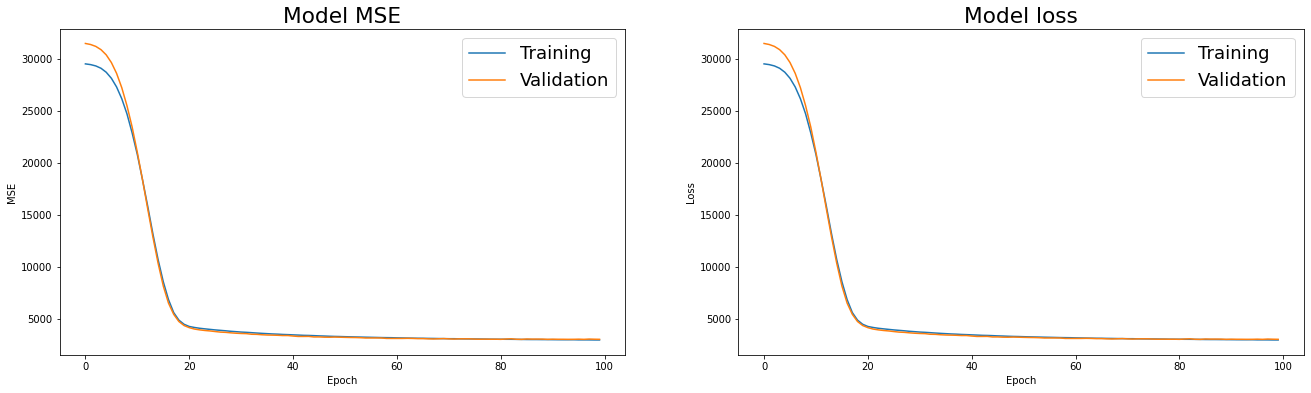

In [26]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['mse'], label = 'Training')
ax[0].plot(fitted_model.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'], label = 'Training')
ax[1].plot(fitted_model.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [ ]:
predictions

array([[180.8866  ],
       [191.41367 ],
       [166.49924 ],
       [248.53984 ],
       [181.225   ],
       [267.30652 ],
       [156.55711 ],
       [ 63.16801 ],
       [149.9561  ],
       [177.9379  ],
       [226.57066 ],
       [197.67667 ],
       [103.00855 ],
       [224.48575 ],
       [100.59019 ],
       [211.25035 ],
       [ 80.618835],
       [125.5426  ],
       [134.7795  ],
       [152.13954 ],
       [ 82.08635 ],
       [ 83.62086 ],
       [183.67824 ],
       [128.76411 ],
       [226.00377 ],
       [183.44778 ],
       [114.830765],
       [ 95.92123 ],
       [175.37903 ],
       [228.69032 ],
       [234.80293 ],
       [239.44107 ],
       [150.4726  ],
       [126.93568 ],
       [126.34586 ],
       [156.52702 ],
       [111.00836 ],
       [227.22414 ],
       [206.1629  ],
       [128.3827  ],
       [111.140205],
       [122.18764 ],
       [190.5603  ],
       [231.38179 ],
       [148.32832 ],
       [243.16248 ],
       [164.7047  ],
       [191.3

### Visualisation of residuals

In [ ]:
import seaborn as sns

In [ ]:
y_test

array([107., 212., 196., 248., 164., 220., 131.,  78.,  97.,  66., 155.,
       222., 101., 192., 158., 259.,  87., 132.,  49., 276.,  37., 134.,
        78.,  84., 236., 167.,  78., 115.,  85., 232., 268., 317., 198.,
        71., 214., 118.,  72., 280., 166., 144., 135.,  68., 129., 246.,
        50., 242., 104.,  68., 127.,  90., 214., 275., 311., 252., 293.,
        52., 143., 107.,  58.,  77., 134., 200., 233., 152., 126., 144.,
       103., 137., 163., 101., 180., 122.,  72.,  59.,  96., 145., 259.,
       158., 243., 183., 138., 292.,  44.,  43.,  90.,  52.,  71.,  52.,
       332., 139.,  65., 174., 288.,  74., 195.,  39.,  25., 142.,  53.,
       141., 244.,  97., 146., 178., 181., 170., 206., 303.,  92., 296.,
       232., 198., 242.,  71., 230.,  83., 102., 281., 265., 139., 341.,
        96., 170., 150., 179., 217., 151., 160., 200.,  65.,  64., 113.,
       263.])

In [ ]:
predictions

array([[180.8866  ],
       [191.41367 ],
       [166.49924 ],
       [248.53984 ],
       [181.225   ],
       [267.30652 ],
       [156.55711 ],
       [ 63.16801 ],
       [149.9561  ],
       [177.9379  ],
       [226.57066 ],
       [197.67667 ],
       [103.00855 ],
       [224.48575 ],
       [100.59019 ],
       [211.25035 ],
       [ 80.618835],
       [125.5426  ],
       [134.7795  ],
       [152.13954 ],
       [ 82.08635 ],
       [ 83.62086 ],
       [183.67824 ],
       [128.76411 ],
       [226.00377 ],
       [183.44778 ],
       [114.830765],
       [ 95.92123 ],
       [175.37903 ],
       [228.69032 ],
       [234.80293 ],
       [239.44107 ],
       [150.4726  ],
       [126.93568 ],
       [126.34586 ],
       [156.52702 ],
       [111.00836 ],
       [227.22414 ],
       [206.1629  ],
       [128.3827  ],
       [111.140205],
       [122.18764 ],
       [190.5603  ],
       [231.38179 ],
       [148.32832 ],
       [243.16248 ],
       [164.7047  ],
       [191.3

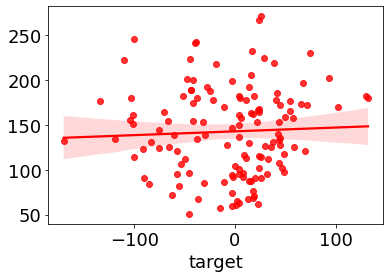

In [27]:
# insert code here

residuals = predictions - y_test
sns.regplot(x = residuals, y  = predictions, data= None, scatter = True, color='red')



TypeError: ignored

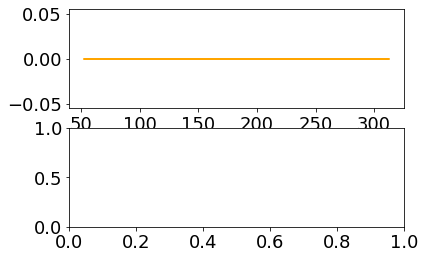

In [ ]:
#x_zero = predictions
#y_zero = np.zeros(len(y_test))
#fig, axs = plt.subplots(2, 1)
#axs[0].plot(x_zero, y_zero, color ='orange')
#axs[0].scatter(predictions, )

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

© 2020 Institute of Data